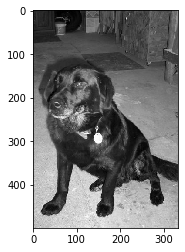

In [30]:
import numpy as np  #array operations
import matplotlib.pyplot as plt #to plot image
import os  #to iterate through directories and 
import cv2  #image operations

DATADIR = "./kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to cats or dogs directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [31]:
print(img_array)

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


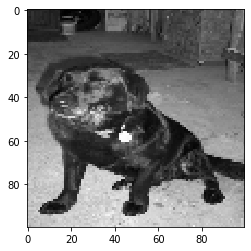

In [32]:
new_array = cv2.resize(img_array, (100, 100))
plt.imshow(new_array, cmap="gray")
plt.show()

In [33]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to cats or dogs directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (100, 100))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [34]:
print(len(training_data))

24946


In [35]:
import random

random.shuffle(training_data)

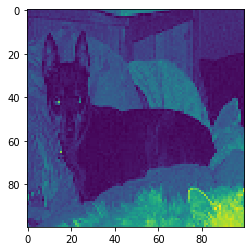

0


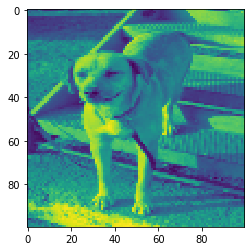

0


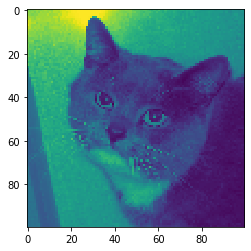

1


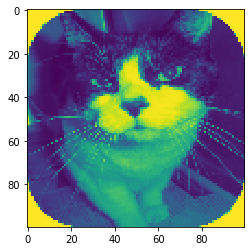

1


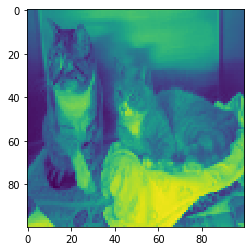

1


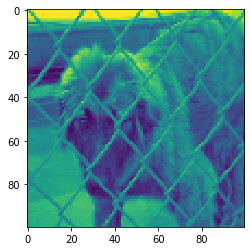

0


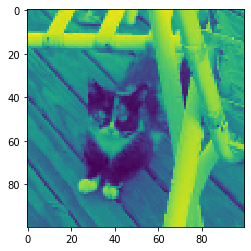

1


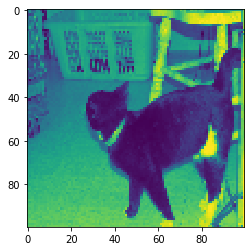

1


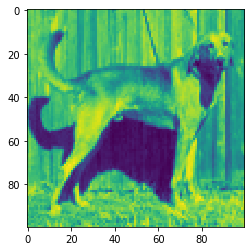

0


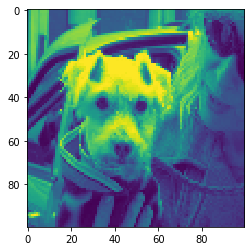

0


In [36]:
for sample in training_data[:10]:
    plt.imshow(sample[0])
    plt.show()
    print(sample[1])

In [37]:
X = []
y = []

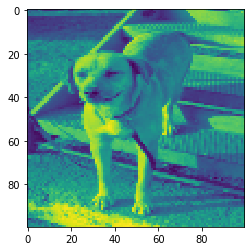

In [38]:
for feature, label in training_data:
    X.append(feature)
    y.append(label)
    
plt.imshow(X[1])
plt.show()
# neural network input has to be a numpy array
# -1: means how many features we have, we set it to accept any number
# 100, 100: shape of our image
# 1: means our picture is in greyscale, thus there is only one variable (should be 3 for colored picture)
X = np.array(X).reshape(-1, 100, 100, 1)

In [27]:
# save our data so we don't have to load data everytime while tweaking our model
import pickle

pickle_out =  open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out =  open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [39]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

print(X[1])

[[[237]
  [246]
  [235]
  ...
  [165]
  [169]
  [163]]

 [[244]
  [229]
  [202]
  ...
  [183]
  [164]
  [166]]

 [[239]
  [238]
  [223]
  ...
  [182]
  [163]
  [155]]

 ...

 [[196]
  [189]
  [195]
  ...
  [172]
  [173]
  [171]]

 [[201]
  [205]
  [193]
  ...
  [149]
  [156]
  [169]]

 [[177]
  [163]
  [193]
  ...
  [155]
  [181]
  [207]]]
